# **INMERSIÓN DE DATOS CON PYTHON**

##**Problema de negocio**
---






La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

**Las tareas principales serán:**

0. **Configuración del Ambiente**: Importar las librerias que serán utilizadas para la consecusión del modelo.
1. **Preprocesamiento de Datos**: Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.
2. **Exploración de Datos**: Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.
3. **Construcción de Modelos y Evaluación de Modelos**: Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros. Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. S
4. **Refinamiento y Selección del Modelo**: Balanceo de variable objetivo, eliminación de variables irrelevantes y selección del modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

##**0. Configuración del Ambiente**
---



In [ ]:
#Se importan librerias con sus respectivos alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from google.colab import drive
from imblearn.over_sampling import SMOTE
import warnings

drive.mount("/content/Drive") #Se referencia el drive de donde se obtendra el archivo cvs
warnings.filterwarnings("ignore") # Se especifica que todas las advertencias deben ser ignoradas

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


## **1. Preprocesamiento de Datos**
---



Los modelos de machine learning pueden ser de clasificación, clusterización o regresión, en este caso es de clasificacion.

In [ ]:
#Se declaran variables que seran usadas durante el preprocesamiento de datos
global df_banco
global resultados

pd.set_option('display.max_columns', None) #Se especifica como seran mostradas las columnas
df_banco = pd.read_csv('/content/Drive/MyDrive/german_credit.csv') #Se indica cual es el archivo del cual se extraeran los datos
df_banco.head() #Se solicita mostrar los registros iniciales


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


- Es importante notar que la variable objetivo es la columna default, que es la que nos indica si una pesona es buen cliente o mal cliente, es decir si es o no responsable con sus obligaciones crediticias.

In [ ]:
df_banco.shape #Muestra la cantidad de registros y columnas

(1000, 21)

In [ ]:
df_banco.columns #Muestra los nombres de las columnas

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [ ]:
df_banco.info() #Muestra la informacion detallada de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
df_banco.account_check_status.value_counts().index #Agrupa los valores que se encuentran en esa columna

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [ ]:
columnas = list(df_banco.select_dtypes(include=['object']).columns) #Se muestran las columnas con datos descriptivos y no numericos
for columna in columnas:
  print(f'Nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

Nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


Nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


Nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


Nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


Nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


Nombre de la columna: personal_status_sex
['male : single', 'female : divorced/separ

In [ ]:
#Funcion que realiza limpieza de los datos
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [ ]:
procesar_datos()
df_banco.sample(7) #Muestra aleatoriamente la cantidad de registros indicados

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
379,0,4,6,5,1,362,4,3,4,2,1,4,3,52,3,2,2,2,1,0,1
74,1,1,36,3,8,1977,1,1,4,3,1,4,4,40,3,2,1,4,1,1,1
400,0,4,18,3,5,1473,5,4,3,4,1,4,1,39,3,2,1,3,1,1,1
649,1,1,12,3,8,684,5,3,4,3,1,4,3,40,3,1,1,2,2,0,1
905,0,1,12,3,5,1107,5,3,2,3,1,2,1,20,3,1,1,4,2,1,1
478,0,2,12,3,10,1037,4,2,3,3,1,4,1,39,3,2,1,2,1,0,1
336,0,2,13,3,5,2101,5,4,2,2,3,4,2,23,3,2,1,2,1,0,1


## **2. Exploracion de los Datos**
---



In [ ]:
#Funcion que realiza la codificación de variables categóricas y normalización
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [ ]:
feature_engineering()
df_banco.head(5) #Muestra como quedan los datos luego de la categorizacion y normalizacion

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [ ]:
df_banco.describe()#Muestra promedios de los valores luego de la normalizacion

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


In [ ]:
# Funcion para dibujar histogramas de los valores de las columnas
def analisis_exploratorio():
  global df_banco
  histogramas = ['default', 'account_check_status', 'credit_history', 'purpose',
    'savings', 'present_emp_since', 'installment_as_income_perc',
    'other_debtors', 'present_res_since', 'property', 'other_installment_plans',
    'housing', 'credits_this_bank', 'job', 'people_under_maintenance',
    'telephone', 'foreign_worker', 'sexo', 'estado_civil', 'rango_edad',
    'rango_plazos_credito', 'rango_valor_credito']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (15,35))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(8, 3, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=10)
    plt.ylabel('Total', fontsize=10)

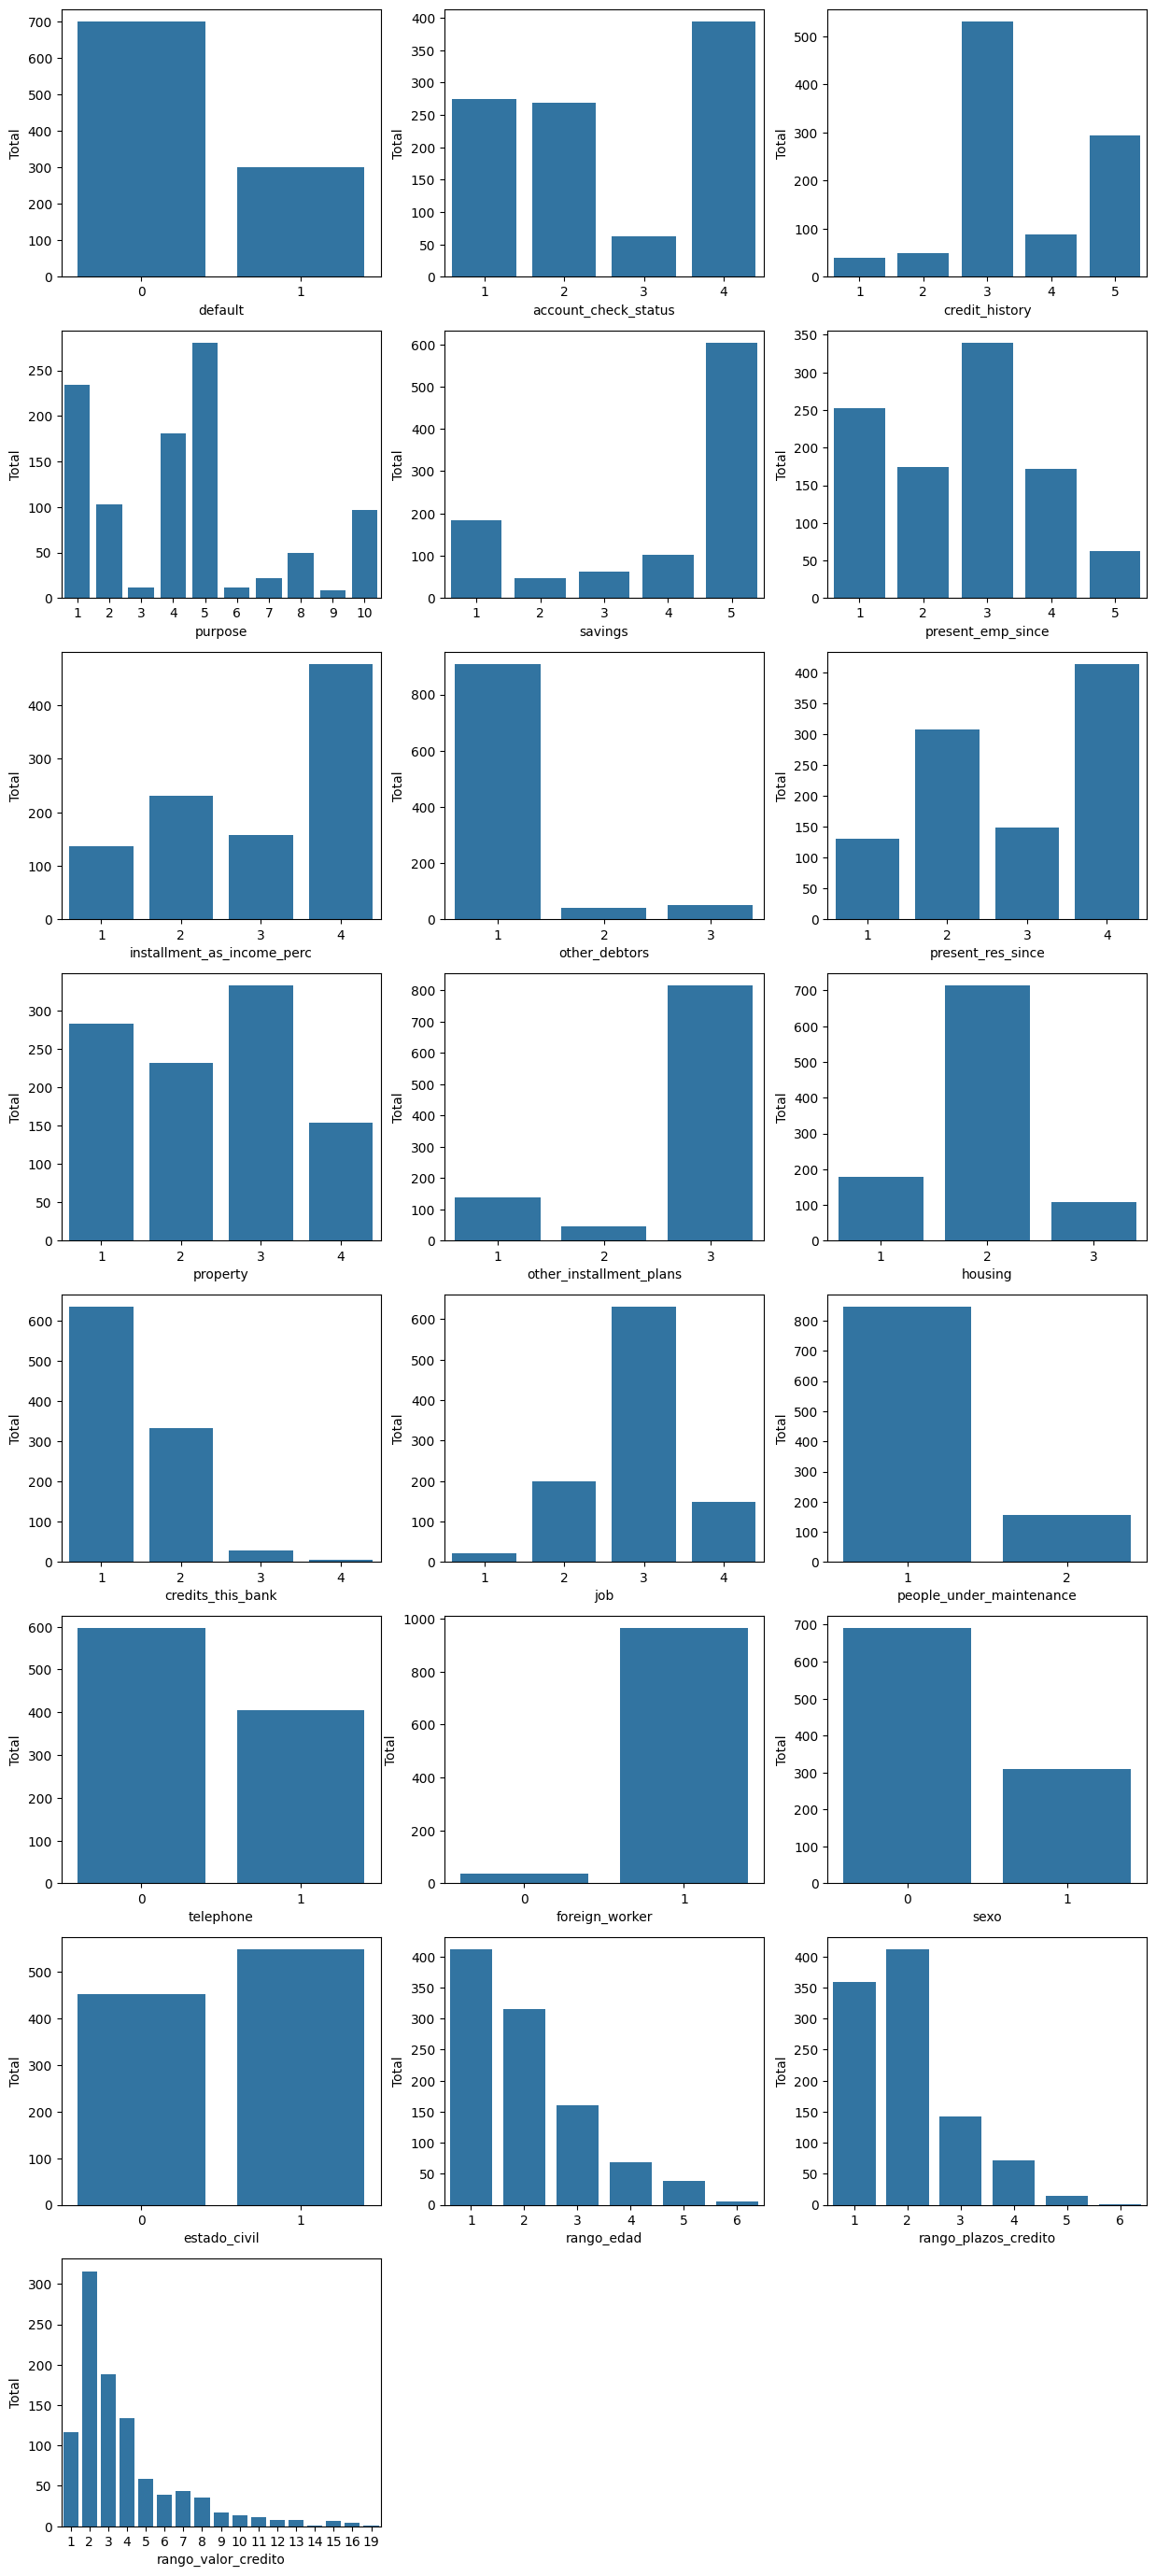

In [ ]:
analisis_exploratorio()

La función `analisis_exploratorio()` muestra histogramas de TODAS las variables y se observa que existen:

- Variables a desestimar debido a que se observa que tienen baja variabilidad.
  - other_debtors
  - foreign_worker

- Variables a desestimar ya que desde un punto de vista lógico no parecen tener sentido en el contexto del problema que se está tratando de resolver.
  - telephone: no parece relevante que tener o no un teléfono deba influir en la aprobación de un crédito.
  - sexo: no parece relevante que el género pueda influir en la aprobación de un crédito. De acuerdo a algunas investigaciones se ha observado que las mujeres son mas responsables que los hombres en cuanto a sus responsabilidades crediticias pero es por un margen estrecho.

- Valores a desestimar ya que su impacto en las distribuciones es nulo o casi nulo.

  Variable : Valor
  - purpose: 3, 6, 9
  - credits_this_bank: 4
  - rango_edad: 6
  - rango_plazos_credito: 6
  - rango_valor_credito: 10, 11, 12, 13, 14, 15, 16, 19


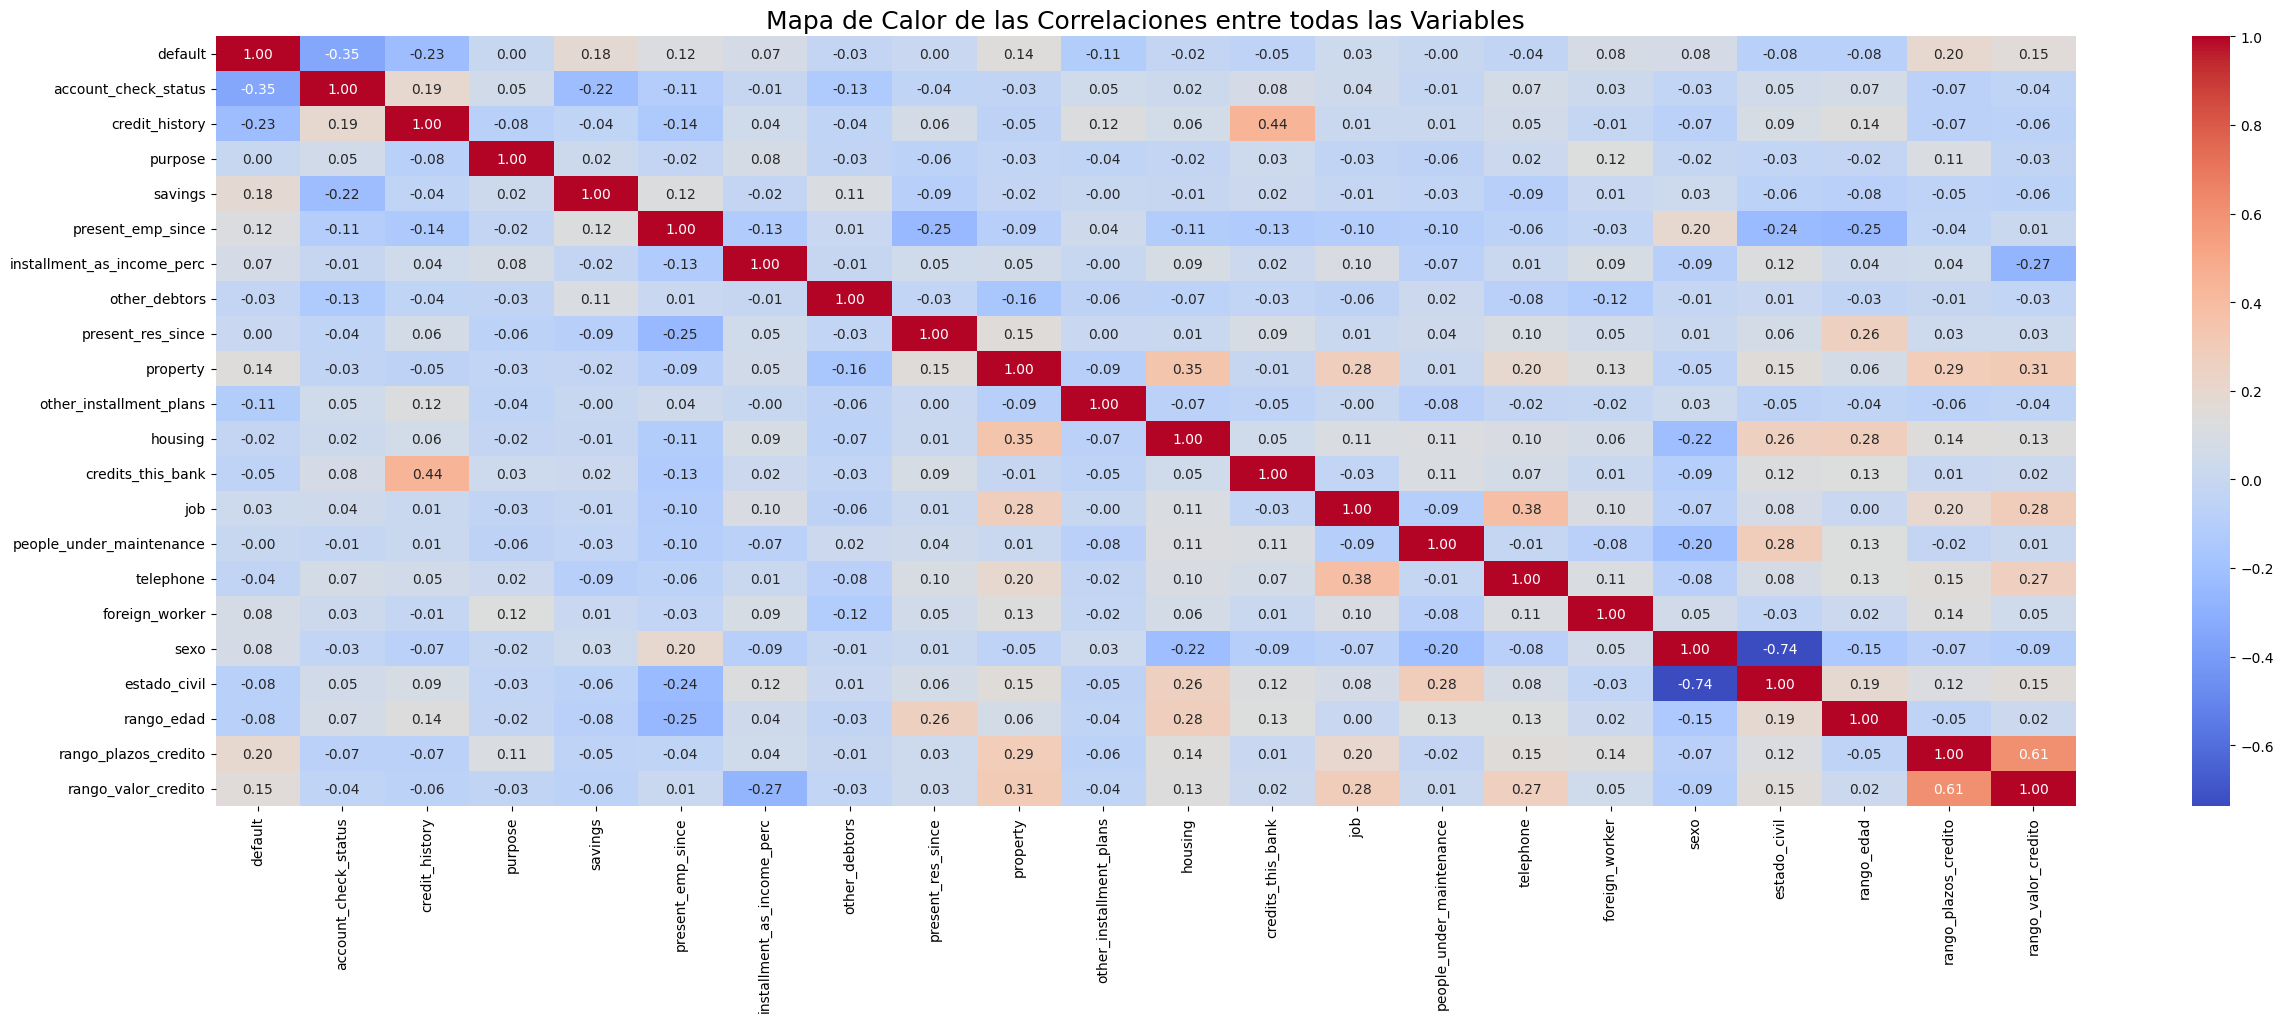

In [ ]:
# Se genera un mapa de calor que muestra la correlatividad entre todas las variables
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de las Correlaciones entre todas las Variables", fontsize=18)
plt.show()

**Mapa de calor**

- La correlatividad fuerte negativa se evidencia en azul oscuro.
- La correlatividad fuerte positiva se ve en rojo oscuro

Se observa que:

  - Las variables más correlacionadas positivamente:
    - rango_plazo_creditos - rango_valor_credito: 0.6
    - job – telephone: 0.4
    - credit_history – credit_this_bank: 0.4
  - Las variables mas correlacionadas negativamente:
    - sexo – estado_civil: -0.7
    - account_check_status – default: 0.4
  - Las variables sexo y estado_civil al tener una correlatividad alta pero entre ellas y no con la variable objetivo las vuelve candidatas a ser excluidas del modelo y asi evitar reduncancia de datos.
  - Muchas variables tienen una correlatividad posivita, con la variable objetivo que es "default", pero esta correlatividad esta por debajo de 0.1 lo que las vuelve candidatas a ser excluidas del modelo pues no aportan a la solución del problema.
  - Muchas variables tienen una correlatividad negativa, con la variable objetivo que es "default", pero esta correlatividad esta por debajo de -0.1 lo que las vuelve candidatas a ser excluidas del modelo pues no aportan a la solución del problema.



## **3. Construcción y Evaluación de Modelos**
---

In [ ]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegresion, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [ ]:
#Funcion que crea los modelos y guarda sus predicciones para ser analizadas a futuro con matrices de confusion
def crea_modelos():
  global df_banco, resultados, prediccionRl, prediccionAd, prediccionRf, prediccionNb, defaultAComparar
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
  defaultAComparar = test_y
  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      if name == "Regresión Logística":
         prediccionRl = predictions
      if name == "Árbol de Decisión":
         prediccionAd = predictions
      if name == "Random Forest":
         prediccionRf = predictions
      if name == "Naive Bayes":
         prediccionNb = predictions
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

  for i,model in enumerate(resultados['Model']):#Muestra los resultados de cada metrica para cada modelo
    print("Modelo:", model)
    print("Metrica Accuracy:", resultados['Accuracy'][i])
    print("Metrica Precision:", resultados['Precision'][i])
    print("Metrica Recall:", resultados['Recall'][i])
    print("Metrica F1-score:", resultados['F1-score'][i])
    print("Metrica AUC-ROC:", resultados['AUC-ROC'][i])
    print()


In [ ]:
crea_modelos()

Modelo: Regresión Logística
Metrica Accuracy: 0.78
Metrica Precision: 0.6785714285714286
Metrica Recall: 0.4418604651162791
Metrica F1-score: 0.5352112676056338
Metrica AUC-ROC: 0.799934796783308

Modelo: Árbol de Decisión
Metrica Accuracy: 0.7133333333333334
Metrica Precision: 0.5
Metrica Recall: 0.43023255813953487
Metrica F1-score: 0.46249999999999997
Metrica AUC-ROC: 0.6286676809389262

Modelo: Random Forest
Metrica Accuracy: 0.7866666666666666
Metrica Precision: 0.72
Metrica Recall: 0.4186046511627907
Metrica F1-score: 0.5294117647058824
Metrica AUC-ROC: 0.7764888067811344

Modelo: Naive Bayes
Metrica Accuracy: 0.74
Metrica Precision: 0.5465116279069767
Metrica Recall: 0.5465116279069767
Metrica F1-score: 0.5465116279069767
Metrica AUC-ROC: 0.7800478156922409



In [ ]:
#Funcion que genera graficas de codigo de barras para la visualización de los resultados de las diferntes metricas
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#4b538b', '#f7a21b','#e45635', '#d60257']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 5), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()


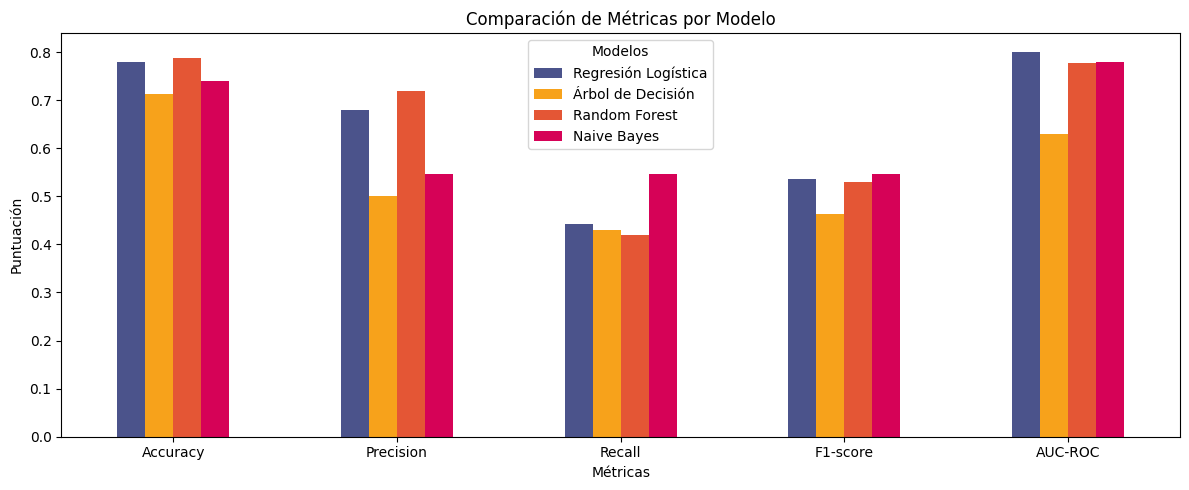

In [ ]:
visualiza_resultados()

In [ ]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Default')
    plt.xlabel('Predicción')
    plt.show()

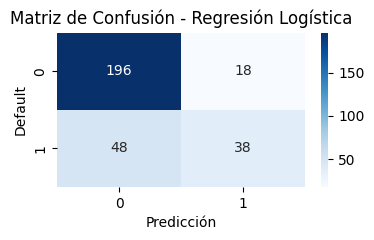

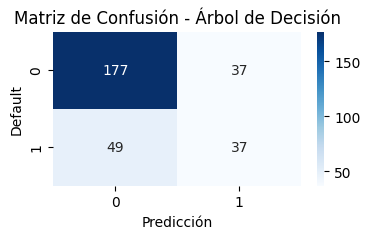

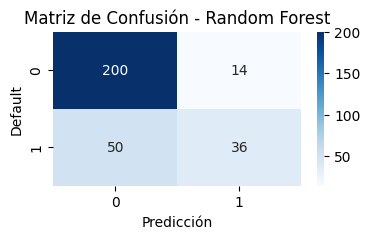

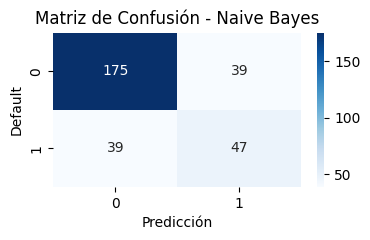

In [ ]:
# Graficar las matrices confusión para cada modelo
print()
plot_confusion_matrix(defaultAComparar, prediccionRl, 'Matriz de Confusión - Regresión Logística')
print()
plot_confusion_matrix(defaultAComparar, prediccionAd, 'Matriz de Confusión - Árbol de Decisión')
print()
plot_confusion_matrix(defaultAComparar, prediccionRf, 'Matriz de Confusión - Random Forest')
print()
plot_confusion_matrix(defaultAComparar, prediccionNb, 'Matriz de Confusión - Naive Bayes')


## **4. Refinamiento y Selección del Modelo**
---



In [ ]:
#Eliminar las variables que no contribuyen al modelo de acuerdo a los analisis previos
variables_a_eliminar = ['purpose', 'installment_as_income_perc', 'other_debtors', 'present_res_since', 'housing', 'credits_this_bank', 'job', 'people_under_maintenance', 'telephone', 'foreign_worker', 'sexo', 'estado_civil', 'rango_edad']
df_banco = df_banco.drop(columns = variables_a_eliminar)
df_banco.columns

Index(['default', 'account_check_status', 'credit_history', 'savings',
       'present_emp_since', 'property', 'other_installment_plans',
       'rango_plazos_credito', 'rango_valor_credito'],
      dtype='object')

In [ ]:
# Balanceo de la variable objetivo que es la columna default
X = df_banco.drop('default', axis=1)
y = df_banco['default']

# Aplicar SMOTE para hacer el oversampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos resampleados
df_banco= pd.DataFrame(X_res, columns=X.columns)
df_banco['default'] = y_res

In [ ]:
crea_modelos()

Modelo: Regresión Logística
Metrica Accuracy: 0.7619047619047619
Metrica Precision: 0.71875
Metrica Recall: 0.8131313131313131
Metrica F1-score: 0.7630331753554501
Metrica AUC-ROC: 0.8201724451724453

Modelo: Árbol de Decisión
Metrica Accuracy: 0.7357142857142858
Metrica Precision: 0.6933333333333334
Metrica Recall: 0.7878787878787878
Metrica F1-score: 0.7375886524822695
Metrica AUC-ROC: 0.7476794976794976

Modelo: Random Forest
Metrica Accuracy: 0.7642857142857142
Metrica Precision: 0.7239819004524887
Metrica Recall: 0.8080808080808081
Metrica F1-score: 0.7637231503579952
Metrica AUC-ROC: 0.8644894894894894

Modelo: Naive Bayes
Metrica Accuracy: 0.7523809523809524
Metrica Precision: 0.7155963302752294
Metrica Recall: 0.7878787878787878
Metrica F1-score: 0.75
Metrica AUC-ROC: 0.8058626808626809



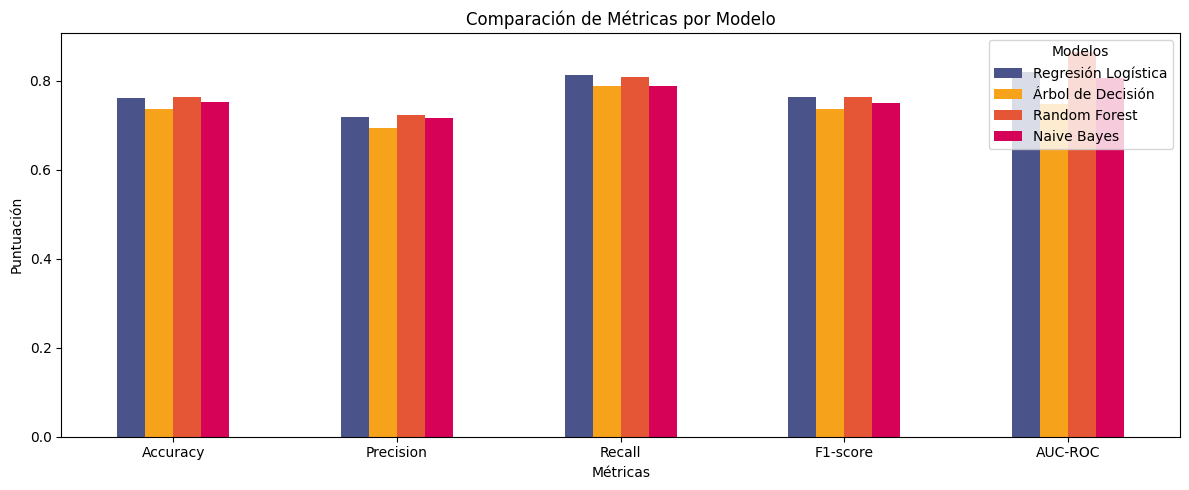

In [ ]:
visualiza_resultados()

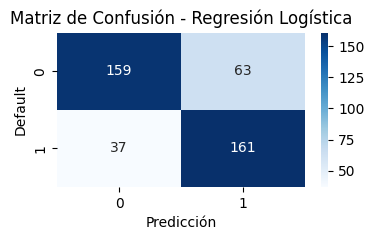

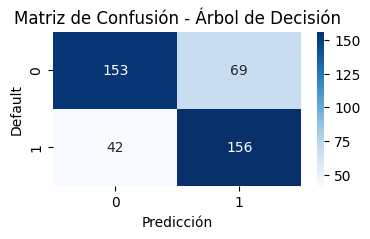

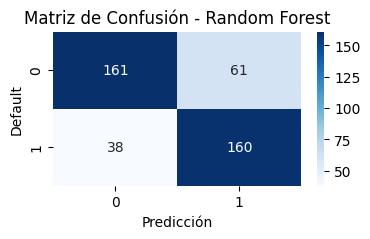

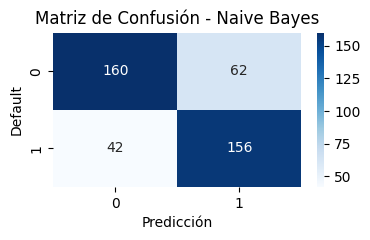

In [ ]:
# Graficar las matrices confusión para cada modelo
print()
plot_confusion_matrix(defaultAComparar, prediccionRl, 'Matriz de Confusión - Regresión Logística')
print()
plot_confusion_matrix(defaultAComparar, prediccionAd, 'Matriz de Confusión - Árbol de Decisión')
print()
plot_confusion_matrix(defaultAComparar, prediccionRf, 'Matriz de Confusión - Random Forest')
print()
plot_confusion_matrix(defaultAComparar, prediccionNb, 'Matriz de Confusión - Naive Bayes')

## **Selección del Modelo**
---



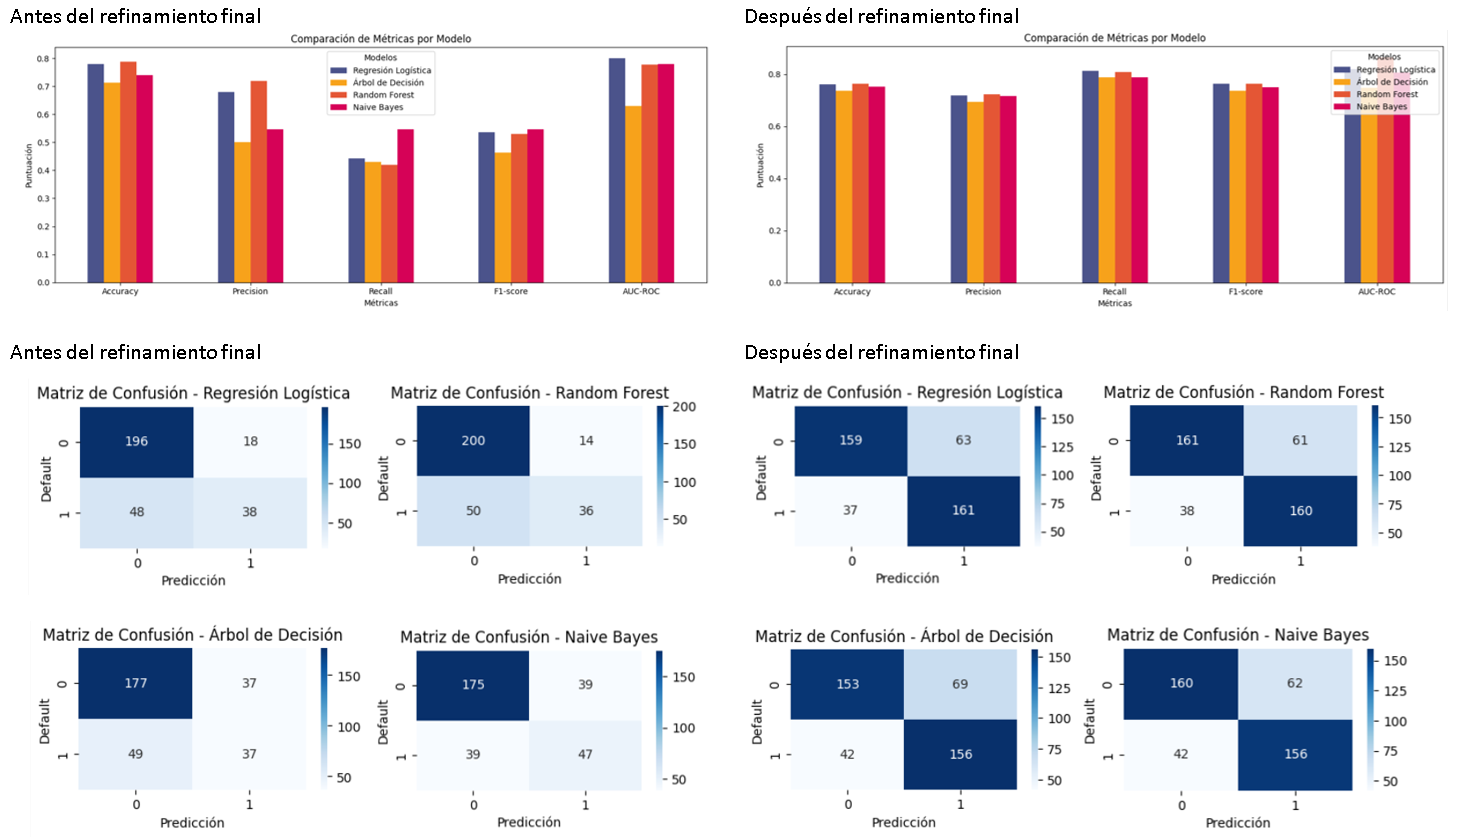

Luego de la desestimación de las variables que no contribuyen al modelo (de acuerdo a los análisis previos) y al balanceo de la variable objetivo:
- Decantó en un mejoramiento, o emparejamiento en general en los resultados de las métricas.
- En cuanto a las matrices de confusión se observa que Random Forest presenta el menor número de falsos positivos en ambos escenarios.

**Mejor modelo priorizando minimizar los falsos positivos**
- **Random Forest**: Debemos centrarnos en la métrica de Precision ya que en esta es relevante esta priorización. De acuerdo a lo anterior y teniendo en cuenta la matriz de confusión, el modelo con los mejores resultados en la métrica de precisión es el Random Forest.

**Mejor modelo en términos generales**
- **Regresión Logística**: Tiene la mayor puntuación en AUC-ROC, que es una métrica clave para evaluar la capacidad de un modelo para distinguir entre clases. Además, tiene una buena precisión y un F1-score razonable. Aunque no tiene el mejor recall, la alta puntuación de AUC-ROC sugiere un buen equilibrio entre las métricas de sensibilidad y especificidad.

